# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | This recent long-haul experien...
1,✅ Trip Verified | Check-in was slow with onl...
2,Not Verified | Check in was smooth enough. Bo...
3,✅ Trip Verified | Although transferring to thi...
4,✅ Trip Verified | We are extremely grateful ...


In [4]:
import os

# Create 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Then save the file
df.to_csv("data/BA_reviews.csv", index=False)


In [6]:
df.to_csv("data/BA_reviews.csv")

In [5]:
df

,reviews
0,Not Verified | This recent long-haul experien...
1,✅ Trip Verified | Check-in was slow with onl...
2,Not Verified | Check in was smooth enough. Bo...
3,✅ Trip Verified | Although transferring to thi...
4,✅ Trip Verified | We are extremely grateful ...
...,...
995,Not Verified | I did not actually fly because...
996,✅ Trip Verified | The start of our journey bac...
997,Not Verified | Chicago to Zurich via London. D...
998,✅ Trip Verified | Glasgow to London. Smooth fl...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (first time only)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_review(text):
    # Remove "✅ Trip Verified" and similar tokens
    text = re.sub(r'✅\s*Trip Verified', '', text)
    
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text.strip()

# Apply cleaning
df['Cleaned_Review'] = df['reviews'].apply(clean_review)

# Preview cleaned text
print(df[['reviews', 'Cleaned_Review']].head())


                                             reviews  \
0  Not Verified |  This recent long-haul experien...   
1  ✅ Trip Verified |   Check-in was slow with onl...   
2  Not Verified |  Check in was smooth enough. Bo...   
3  ✅ Trip Verified | Although transferring to thi...   
4  ✅ Trip Verified |   We are extremely grateful ...   

                                      Cleaned_Review  
0  verified recent longhaul experience disappoint...  
1  checkin slow one staff member checking economy...  
2  verified check smooth enough boarding chaotic ...  
3  although transferring flight heathrow budapest...  
4  extremely grateful crew flight ba0058 cape tow...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['Cleaned_Review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Cleaned_Review
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
df['Cleaned_Review'].describe()

count                                                  1000
unique                                                 1000
top       verified recent longhaul experience disappoint...
freq                                                      1
Name: Cleaned_Review, dtype: object

In [9]:
df['Cleaned_Review'].head()

0    verified recent longhaul experience disappoint...
1    checkin slow one staff member checking economy...
2    verified check smooth enough boarding chaotic ...
3    although transferring flight heathrow budapest...
4    extremely grateful crew flight ba0058 cape tow...
Name: Cleaned_Review, dtype: object

In [10]:
df['Cleaned_Review']

0      verified recent longhaul experience disappoint...
1      checkin slow one staff member checking economy...
2      verified check smooth enough boarding chaotic ...
3      although transferring flight heathrow budapest...
4      extremely grateful crew flight ba0058 cape tow...
                             ...                        
995    verified actually fly pilot strike review poor...
996    start journey back efl inauspicious hundreds d...
997    verified chicago zurich via london delays dela...
998    glasgow london smooth flight departurearrival ...
999    booked flight week ba strike mistakingly think...
Name: Cleaned_Review, Length: 1000, dtype: object

In [11]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

In [13]:
df['Sentiment']

0      negative
1      negative
2      positive
3      positive
4      positive
         ...   
995    positive
996    positive
997    positive
998    positive
999    positive
Name: Sentiment, Length: 1000, dtype: object

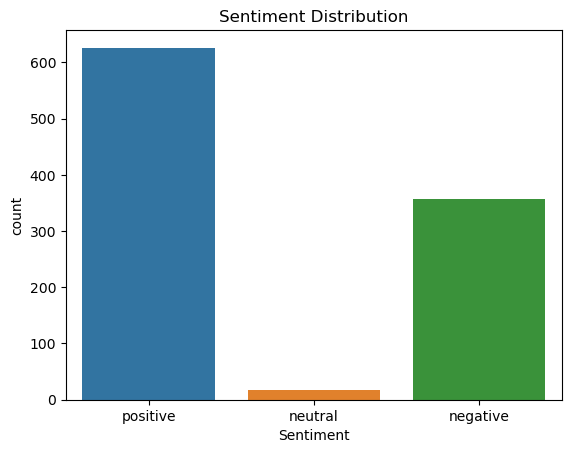

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution')
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features (X) and target labels (y)
X = df['Cleaned_Review']  # Text data
y = df['Sentiment']       # Sentiment labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a simple classifier
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.69      0.46      0.55        68
     neutral       0.00      0.00      0.00         3
    positive       0.76      0.91      0.83       129

    accuracy                           0.74       200
   macro avg       0.48      0.46      0.46       200
weighted avg       0.73      0.74      0.72       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
